In [89]:
from datetime import datetime
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import tqdm

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/merged_221220_221231.csv')
data['gasPrice'] = data['gasPrice'] / 10 ** 9
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN


# 1. Количество транзакций Lido/ Non Lido

In [3]:
data.shape

(11527423, 15)

In [4]:
print(f"Total number of unique validators {data['validator'].nunique()}")
print(f"Total number of unique validators public keys {data['public_key'].nunique()}")
print(f"Total number of blocks {data['blockNumber'].nunique()}")

Total number of unique validators 78754
Total number of unique validators public keys 78754
Total number of blocks 85944


In [5]:
data['validator_type'] = 'Lido'
data.loc[data['validator_name'].isna(), 'validator_type'] = 'Non Lido'

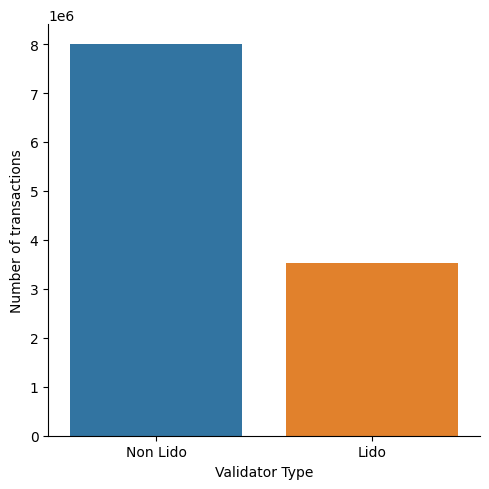

In [6]:
g = sns.catplot(data=data, x="validator_type", kind="count")
g.set(ylabel='Number of transactions', xlabel='Validator Type')
plt.show()

In [7]:
data['eth_datetime'] = pd.to_datetime(data['timestamp_x'], unit='s')
data['eth_hour'] = [datetime(x.year, x.month, x.day, x.hour) for x in data['eth_datetime'].tolist()]
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00


In [8]:
hour_data = pd.pivot_table(data[['eth_hour', 'validator_type', 'gasPrice', 'tx_hash']],
                           index='eth_hour', values=['gasPrice', 'tx_hash'],
                           aggfunc={'tx_hash': 'count', 'gasPrice': 'mean'},
                           columns='validator_type')

In [9]:
hour_data

gasPrice            tx_hash         
validator_type            Lido   Non Lido    Lido Non Lido
eth_hour                                                  
2022-12-19 21:00:00  21.253256  21.085744   14807    29028
2022-12-19 22:00:00  25.985921  27.149318   12011    32153
2022-12-19 23:00:00  19.253743  19.081004   14436    28034
2022-12-20 00:00:00  17.140613  16.753229   11058    29665
2022-12-20 01:00:00  17.354385  16.370288   11576    27925
...                        ...        ...     ...      ...
2022-12-31 16:00:00  23.246663  23.384683   13275    27800
2022-12-31 17:00:00  17.965450  17.899954   11530    29823
2022-12-31 18:00:00  19.766482  19.191375   12078    26422
2022-12-31 19:00:00  17.776543  18.416145   11489    27614
2022-12-31 20:00:00  17.899185  17.665073   12623    25833

[288 rows x 4 columns]

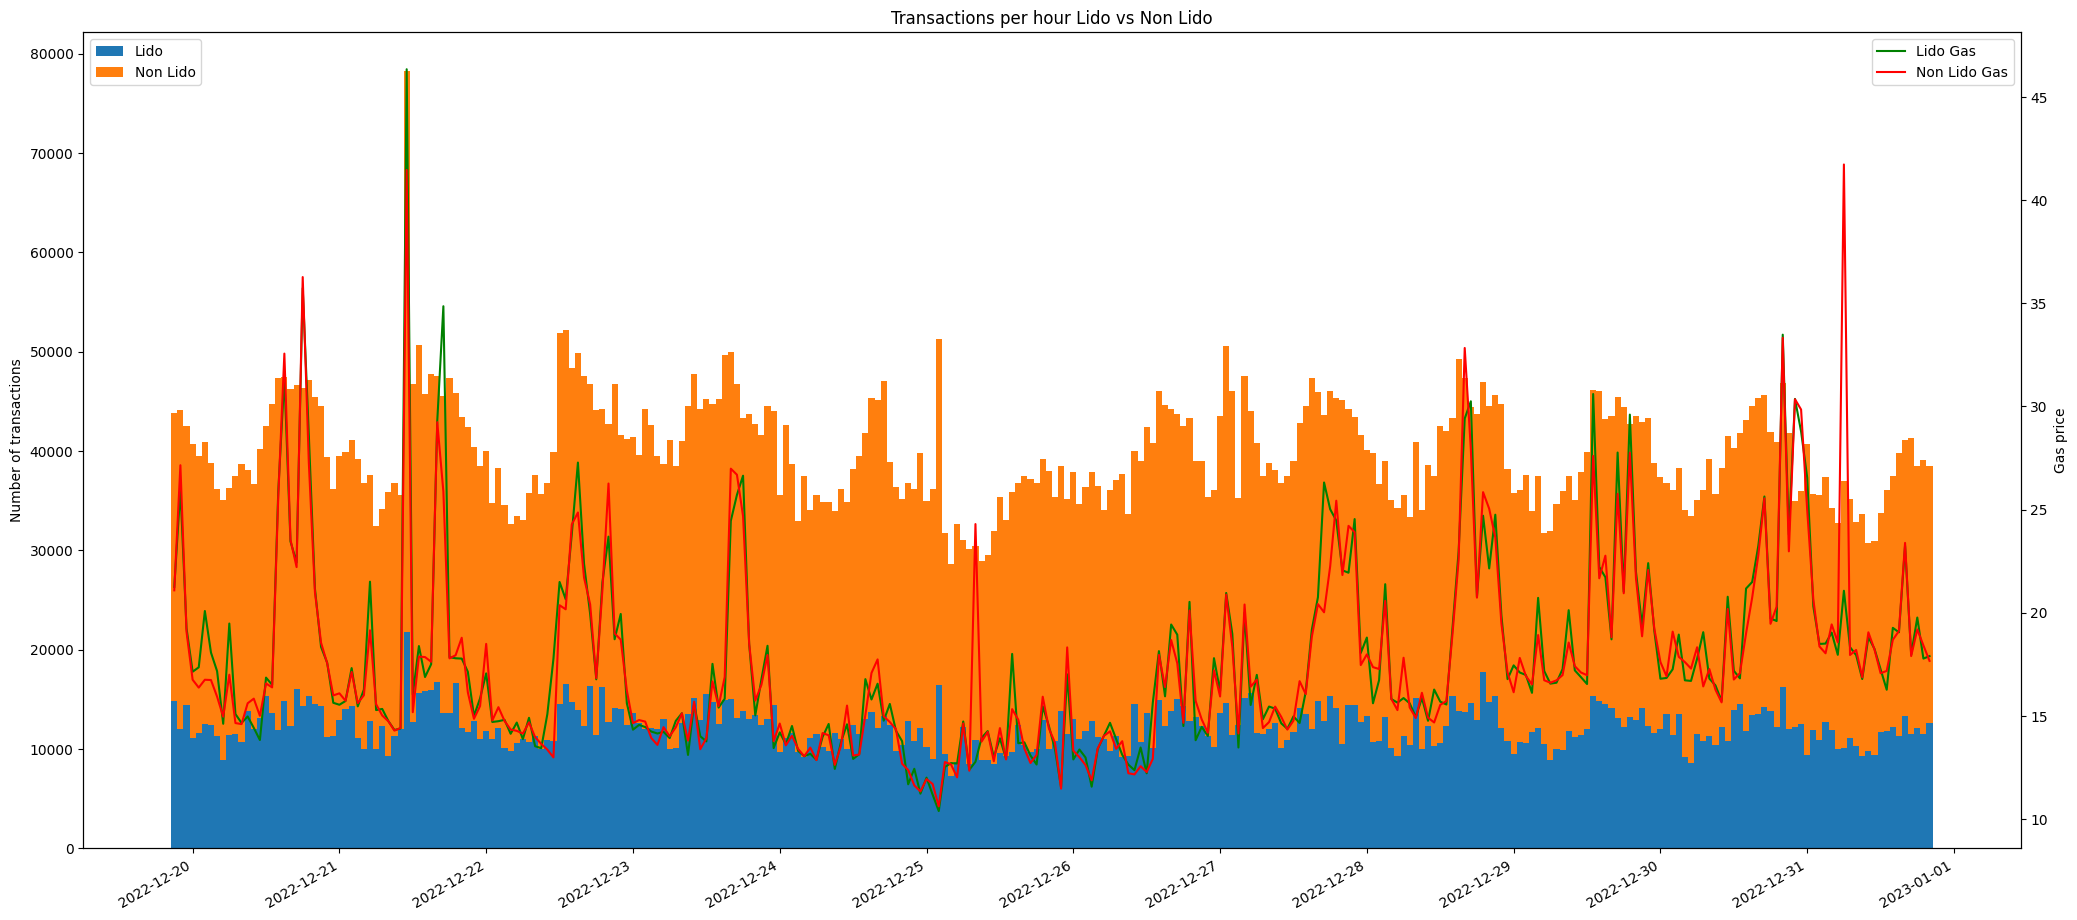

In [10]:
import matplotlib.dates as mdates

_ = plt.figure(figsize=(25, 12))
ax = plt.subplot()

width = 1.0 / 24
ax.bar(hour_data.index, hour_data['tx_hash']['Lido'], width, label='Lido')
ax.bar(hour_data.index, hour_data['tx_hash']['Non Lido'], width, bottom=hour_data['tx_hash']['Lido'],
       label='Non Lido')

ax_gas = ax.twinx()
ax_gas.plot(hour_data.index, hour_data['gasPrice']['Lido'], label='Lido Gas', color='green')
ax_gas.plot(hour_data.index, hour_data['gasPrice']['Non Lido'], label='Non Lido Gas', color='red')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title('Transactions per hour Lido vs Non Lido')
plt.xlabel('Date')
ax.set_ylabel('Number of transactions')
ax_gas.set_ylabel('Gas price')
ax.legend(loc=2)
ax_gas.legend(loc=0)
plt.show()

# 2. Посмотрим на поле to

In [11]:
print(f'Total number of unique addresses "to": {data["to"].nunique()}')

Total number of unique addresses "to": 1469577


In [12]:
from web3 import Web3, IPCProvider

geth_ipc = '/media/Warehouse/Warehouse/Ethereum/data/.ethereum/geth.ipc'
w3 = Web3(IPCProvider(geth_ipc))
# Check
print ("Latest Ethereum block number" , w3.eth.blockNumber)

Latest Ethereum block number 16347174


In [13]:
contracts = []
contracts_codelen = []
for address in tqdm.tqdm(data["to"].unique()):
    if type(address) is not str:
        continue
    code = w3.eth.get_code(address)
    if len(code) > 0:
        contracts.append(address)
        contracts_codelen.append(len(code))

100%|█████████████████████████████████████████████████████████████████████| 1469578/1469578 [19:02<00:00, 1286.53it/s]


In [14]:
print(f'Total number of contracts: {len(contracts)}')

Total number of contracts: 110495


In [15]:
contracts_set = set(contracts)
data['is_contract_transaction'] = data['to'].apply(lambda x: x in contracts_set)
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True


In [16]:
data.to_csv('data/merged_221220_221231_with_contracts.csv')

## А много ли транзакций с контрактами?

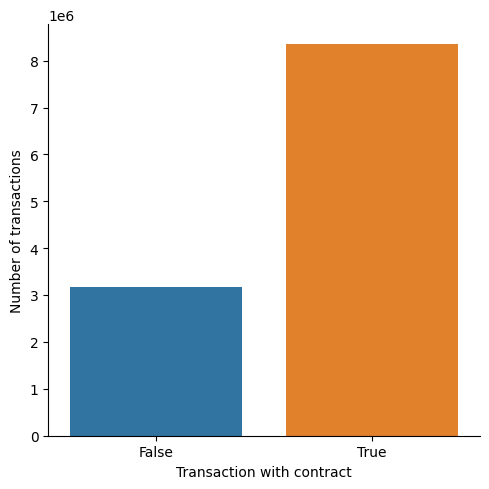

In [17]:
g = sns.catplot(data=data, x="is_contract_transaction", kind="count")
g.set(ylabel='Number of transactions', xlabel='Transaction with contract')
plt.show()

## Посмотрим сколько есть значимых контрактов

In [18]:
contracts_df = pd.DataFrame(data[data['is_contract_transaction']]['to'].value_counts())
contracts_df = contracts_df.reset_index().rename({'index': 'contract', 'to': 'transactions'}, axis=1)
contracts_df

,contract,transactions
0,0xdAC17F958D2ee523a2206206994597C13D831ec7,1042798
1,0x00000000006c3852cbEf3e08E8dF289169EdE581,564820
2,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,467017
3,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,273982
4,0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D,224322
...,...,...
110490,0x96c75BfA74C82145a5646e5fB8cd70Cd1740ff2B,1
110491,0x8708E21b6470249be6AeC5059C3C51199ED6FE57,1
110492,0xb62435dd31d27277a5A736657c288242969ba504,1
110493,0xdB56c0D8198cd459604EcdE065596923A03e075a,1


In [19]:
sum(contracts_df['transactions'].values[30000:]) / contracts_df['transactions'].sum()

0.014646019239680504

In [20]:
contracts_df[contracts_df['transactions'] < 1000]['transactions'].sum()

1799238

In [23]:
contracts_df.to_csv('contracts_221220_221231.csv', index=False)

In [24]:
contracts_df = pd.read_csv('contracts_221220_221231.csv')

## Загрузим ABI (получаем отдельным скриптом - gather_contracts_abi.py)

In [142]:
with open('contracts_abi.pickle', 'rb') as f:
    contract_abi = pickle.load(f)

In [143]:
len(contract_abi)

5734

In [144]:
import re

types_to_skip = [
                 # 'bytes', 'bytes[]', 'bytes2', 'bytes2[]', 'bytes32', 'bytes32[]', 'bytes32[][]',
                 # 'int64', 'int128',
                 # 'int64[]', 'int128[]',
                 # 'uint8', 'uint16', 'uint24', 'uint32', 'uint40', 'uint48', 'uint64',
                 # 'uint96', 'uint120', 'uint128', 'uint224', 'uint256',
                 # 'uint8[]', 'uint16[]', 'uint24[]', 'uint32[]', 'uint40[]', 'uint48[]', 'uint64[]',
                 # 'uint96[]', 'uint120[]', 'uint128[]', 'uint224[]', 'uint256[]',
                 'bool', 'bool[]',
                 'string', 'string[]']

tuple_array_1 = re.compile('tuple\[[\d]*\]$')
tuple_array_2 = re.compile('tuple\[[\d]*\]\[[\d]*\]$')
address_array_1 = re.compile('address\[[\d]*\]$')

def get_addresses_from_tuple(arg, param):
    # print('Parsing tuple')
    # print(f'LEN arg {len(arg["components"])}')
    # for i, c in enumerate(arg['components']):
    #     print(f'Component {i}: {c}')
    # print(f'LEN param {len(param)}')
    # for i, c in enumerate(param):
    #     print(f'Param {i}: {c}')
    # print('\n')
    # # Разбираем компоненты
    addresses = []
    for i in range(len(arg['components'])):
        # print(f'PARSING COMPONENT {i}')
        # print('component:')
        component = arg['components'][i]
        # print(component)
        # print('param:')
        comp_arg = param[i]
        # print(comp_arg)
        if component['type'] == 'address':
            addresses.append(comp_arg)
        # elif component['type'] == 'address[]':
        elif address_array_1.match(component['type']):
            addresses.extend(comp_arg)
        elif component['type'] == 'tuple':
            comp_addresses = get_addresses_from_tuple(component, comp_arg)
            addresses.extend(comp_addresses)
        # elif component['type'] == 'tuple[]':
        elif tuple_array_1.match(component['type']):
            # print(f'get_addresses_from_tuple - tuple_array_1: {comp_arg}')
            for comp_arg_v in comp_arg:
                comp_addresses = get_addresses_from_tuple(component, comp_arg_v)
                addresses.extend(comp_addresses)
        # elif component['type'] == 'tuple[][]':
        elif tuple_array_2.match(component['type']):
            # print(f'get_addresses_from_tuple - tuple_array_2: {comp_arg}')
            for comp_arg_v in comp_arg:
                for comp_arg_vv in comp_arg_v:
                    comp_addresses = get_addresses_from_tuple(component, comp_arg_vv)
                    addresses.extend(comp_addresses)
        elif component['type'] in types_to_skip:
            pass
        elif 'int' in component['type']:
            pass
        elif 'bytes' in component['type']:
            pass
        elif 'bool' in component['type']:
            pass
        elif 'string' in component['type']:
            pass
        else:
            # print(f'New type: {component["type"]}')
            raise Exception(f'get_addresses_from_tuple - {component["type"]}')
        
    return addresses

def get_addresses_from_param(arg, param):
    if arg['type'] == 'address':
        return [func_params[arg['name']]]
    # if arg['type'] == 'address[]':
    elif address_array_1.match(arg['type']):
        return func_params[arg['name']]
    elif arg['type'] in 'tuple':
        return get_addresses_from_tuple(arg, param)
    # elif arg['type'] in 'tuple[]':
    elif tuple_array_1.match(arg['type']): 
        # print(f'get_addresses_from_param - tuple_array_1: {param} - {arg["type"]}')
        addresses = []
        for param_v in param:
            addresses.extend(get_addresses_from_tuple(arg, param_v))
        return addresses
    # elif arg['type'] in 'tuple[][]':
    elif tuple_array_2.match(arg['type']):
        # print(f'get_addresses_from_param - tuple_array_2: {param}')
        addresses = []
        for param_v in param:
            for param_vv in param_v:
                addresses.extend(get_addresses_from_tuple(arg, param_vv))
        return addresses
    elif arg['type'] in types_to_skip:
        return []
    elif 'int' in arg['type']:
        return []
    elif 'bytes' in arg['type']:
        return []
    elif 'bool' in arg['type']:
        return []
    elif 'string' in arg['type']:
        return []
    # print(f'New type: {arg["type"]}')
    raise Exception(arg["type"])
    return []

def get_used_addresses(func_obj, func_params):
    addresses = []
    for arg in func_obj.abi['inputs']:
        arg_addresses = get_addresses_from_param(arg, func_params[arg['name']])
        addresses.extend(arg_addresses)        
    return addresses

In [145]:
transaction_used_addresses = {}
contracts = {}
decode_errors = []
n_no_contract = 0
n_json_decoder_error = 0
n_source_not_verified = 0
not_contract_transaction = 0
num_errors = 0

for i, row in tqdm.tqdm(data.iterrows()):
    if row['is_contract_transaction'] is False:
        not_contract_transaction += 1
        continue
    contract_address = row['to']
    if contract_address not in contracts:
        abi = contract_abi.get(contract_address, '')
        if abi == '':
            # print(f'Unknown contract - {contract_address}')
            n_no_contract += 1
            continue
        elif abi == 'JSONDecodeError':
            # print(f'Contract with JSONDecodeError - {contract_address}')
            n_json_decoder_error += 1
            continue
        elif abi == 'Contract source code not verified':
            # print(f'Contract source code not verified - {contract_address}')
            n_source_not_verified += 1
            continue

        contract = w3.eth.contract(address=contract_address, abi=abi)
        contracts[contract_address] = contract
    else:
        contract = contracts[contract_address]
        
    tx = w3.eth.get_transaction(row['tx_hash'])
    try:
        func_obj, func_params = contract.decode_function_input(tx["input"])
    except ValueError:
        # print(f'Error during decoding input data - contract {contract_address} - tx - {row["tx_hash"]}')
        decode_errors.append((contract_address, row["tx_hash"]))
        continue
    except Exception as e:
        print(f'Error during decoding input data - contract {contract_address} - tx - {row["tx_hash"]} - {e}')
        num_errors += 1
        continue
    if func_obj.abi['type'] != 'function':
        print(f'Unknown type: {func_obj.abi["type"]} - {tx_hash}')
    try:
        used_addresses = get_used_addresses(func_obj, func_params)
    except Exception as e:
        print(f'{contract_address} - {row["tx_hash"]} - {e}')
        num_errors += 1
        continue
    transaction_used_addresses[row['tx_hash']] = set(used_addresses)

58675it [02:11, 684.94it/s]

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0x85737eb11a6ee942c616b2797a05d1814be4005b81a12216f81a399da8893da3 - Tried to read 32 bytes.  Only got 31 bytes


239023it [06:56, 872.47it/s] 

Error during decoding input data - contract 0x0311D3e4a472a21d18cF5491224258b61147D34c - tx - 0xa8a5ecffcbfc6b6c7578637d6eb964b75245a7d4c080e8f0f93e62b8667b0255 - Tried to read 96 bytes.  Only got 63 bytes


240596it [06:59, 749.32it/s]

Error during decoding input data - contract 0x0311D3e4a472a21d18cF5491224258b61147D34c - tx - 0x54ac01972cc72c8ad23918dfdbbfa86a79d85b9b694869345226600568f51406 - Tried to read 96 bytes.  Only got 63 bytes


350673it [09:41, 670.30it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xb9dfd7ce9b79ef58a490ba2434e42bf7ecc26e460d624375cb95ddd7b8a7cae9 - Tried to read 128 bytes.  Only got 109 bytes


1723932it [46:40, 746.58it/s] 

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0x913d6ef4ea959ed83e8ffe62b36dfe840e24047884b289c29f7be75513377ed0 - Tried to read 512 bytes.  Only got 255 bytes


1724310it [46:40, 679.72it/s]

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0xdda45030bff38193dbf6ef07903282e8663c57c04f744bd5a462866161d88d40 - Tried to read 512 bytes.  Only got 255 bytes


1725465it [46:42, 783.06it/s]

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0x13e00affa5b758f42b50e26f0b4dcd0d5fff6525cca68fb9ce0e13aa34ff46f8 - Tried to read 512 bytes.  Only got 255 bytes


2217823it [1:00:15, 679.05it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xe3b72406bdcd679f660556acb607a1e58124d7c91961f3e1fac0968390798429 - Tried to read 128 bytes.  Only got 109 bytes


3046093it [1:21:35, 462.58it/s] 

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xfc2b03a89bd28bf4722bfc0b258d3c68ef8e54eaf7f2bffc22120fa5b40d6363 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x210dc0c5cecfb81530b5ca4aff6529846165df6eb3e0aff825a0f5d171a9b149 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x9860c66735624098384322e3a62b404b4a54ad4b758235630b526d181038d6c2 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xbe25bed78b3ac423d954af35fbdd294404d56da52f7c77194ab984eef8ac1cb9 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xee474068ae496852d1ee05de77d1966a2a94c9bf64c91eeba9affe9d915a9c00 - Tried to read 32 

3046144it [1:21:36, 394.61it/s]

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x8a1294c1d8b82c99507126743d5f014a39b6ede8470e94b7a60962a862b21c2e - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xf055eb6282cdd5da092a3dfe6ecd2ca9a9bbff1f120ab2833abbd5e8a8591e87 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xeff64eaf2d22498bec9ef8d598e8c81fecc05eca0d7fad74b36960f7c4daf51f - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x612a633c5efd780617ddafc11a4e7313b4409b73269ee85afe2ae20a3a0ec15d - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x86e160da3d268f6b6ca3ce005a08fe8b509efb331e695110515f19d8a1e5ed94 - Tried to read 32 

3046227it [1:21:36, 329.39it/s]

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xa605c9c94549d01ed2121df3cb15566ac0fae45f234351598cc01f7f095b7d0e - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xd095ade3f690b289d74fd863b9dcefe4a2e618ee85b5b579ab46b45c68acde2d - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x537e81fa882614404f3d696604f013ff9f6db9bd3a58ab5e96347cda7a91d243 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x5335cd052fc99fbce0fc6b63df9a23ac6007dbbe8b35b86f4ce9fc5c58696485 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xdfcc427abc8c5d2419131e8be60f56dcd7eb1c72f00c86d61fb2a765bdc3f30f - Tried to read 32 

3046262it [1:21:36, 312.12it/s]

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xe4395641f8c6280bd2e18d5a188f53e260dd789ece48156a45e277c5b6e41c1b - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xec15eb52046e490a7380da3bbb9eb1f4d94383532cba7769f861d82f21dab739 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xf05f86df39200c73fdb1d8db4b559a0b846525e975d47129644568547aeabe3b - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x90057d6d44dcdf3a5ea47fec1459acbb37f8e70809baf7820a77d9fa5fc2cfee - Tried to read 32 bytes.  Only got 0 bytes


3143319it [1:24:13, 779.75it/s]

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0xcac73c83c34f5bba1e323fe556a1930ed85e93d958015b8bfe021e5e3a0ea6e2 - Tried to read 512 bytes.  Only got 447 bytes


3693882it [1:38:07, 563.09it/s] 

Error during decoding input data - contract 0x98A2AdbC454e5050c657311F9Cd04db443b1746e - tx - 0xee4c8d465af7db8186d50fdd33c268a5a0291b52376088a39c54d7f5e86e754c - Tried to read 32 bytes.  Only got 27 bytes


3694805it [1:38:09, 465.98it/s]

Error during decoding input data - contract 0x98A2AdbC454e5050c657311F9Cd04db443b1746e - tx - 0xe8e29d3865a9b7478f27b8f7ce2594c1fe41df2d5e30a00d019dbfa71cf2e52e - Tried to read 32 bytes.  Only got 27 bytes


4539995it [2:00:15, 1178.17it/s]

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0x38857cc94f10963ce92aa234cacdec8d7d3f21fd7378ccce6ff9a25af3e36e2b - Tried to read 32 bytes.  Only got 31 bytes


4839748it [2:08:16, 404.68it/s] 

Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xa585b6dc40aaf937bb192b8777a0821e07ae7b1b58e36eaa67badf9f83d25582 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x7124a7310131d2f015bb33382dfb295eaf900469e25482d6be01064ca0b6ffcc - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x9885f1af9599a1e5729c537368e6bb0df4926db6feb16d15fffc94d19ab74f40 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xc27a5f128bf4eca54f4dbc9e8f91df5c8ff3e44d697e2c6936f7027d09180dda - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x278804b38e16a7646c26a25a4bca419ed6d551d392d23b900dc52b4bd571e6ff - Tried to read

4840211it [2:08:17, 484.47it/s]

Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x00203f2d1c462b6a886303d4f57277495b7221ec0bb1708557158391f5c73e88 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xfcf0ce38536a962183e33383549c22f1d531b055010b4c08be199756aaf2c40d - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x7140955c25a13ce96a8011d063e2212e644e787f94f092b2f922901c73bd0ad3 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xd628a45649de6264b73c36ede6afe4bb5a11c583e548e7968e69982c5808896e - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x02b282b8ed5735bfbd4c5329c946fdb466b48707aedf5c875471423c3dd1f4cd - Tried to read

4840409it [2:08:17, 456.75it/s]

Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x4e83ea77a2629827d145bade437f2d2582566e5e291cd7c6973873c6952db410 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x0573d6e37a286d952120e6c9ee5da4aafa02b1ae8d3323cfe9353dd1b21db600 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xc4932d80cdde6096661a310331ab0f78eb2b3b47670d06a7e0a79af21807a772 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xbc697fc039690dff27603269cd4e5e7c04966e2fa650d62d9f334db7dfbf47dd - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x5190ea3d137c17a1a8b815a317b0fa44019ce52980d5dbd2368e4e1293b6df7a - Tried to read

4907994it [2:09:58, 536.13it/s] 

Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0x3336bd44ec92e340afd4db85ad286b16d958ab5a9a6c79e6df7c73eca3e33a8f - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0xce7fd3afa125f6e6d8f39d80f6d4f30ad4e2b576609b67a8333f055e0f8f3671 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0x1ba7b33db9330e4a8d121b261dc62e7e5cf6fc3c8205df250c4b19ad2bcd730f - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0xacd4678c95ebdc0d14ed1b3f0132068404c032e2e112c3ca302d1507e646ea17 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0x62b78118fbb2527fba888a13d92d25beb07962bd2a2307f6d28309fa89c4a4b7 - Tried to read 32 

4915080it [2:10:12, 688.69it/s]

Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0x0f7474da6347be80867c523ca56bd283564159fff95fbd944982d3be79680046 - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10=\x05~\x8bB\x9du\x065p\x0e\xe8\xb3\xaf\xf4d\x9f\xc0'
Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0x2ac0350e9f6cdd4c25ec12d9d5e64c1a1266bf05ec75c6ace77d2bd022ea72ff - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa3\\\x11Q+\x1f\xda\xdfEOKM\xe5\xe85G\x0f"z'
Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0xe3f059bfc1cf49e32217f53aaf287fb4a64b2a7fa0577d32cee241aa3e2e21ba - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa1\x83\xe1g|DX\xfb\xfc\xc62\xd0\x81#\xda\x1f\x95\x8e\xfe'
Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0x48e15a9d9516

5147868it [2:15:24, 581.14it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xc866f8c1951a89e562ca7ed4ec7dded61af4b7abf6599f0e531c82f7e951e38e - Tried to read 96 bytes.  Only got 67 bytes


5522717it [2:24:14, 581.27it/s] 

Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0x84bdc65a0ab05052bb8d94abb9ea31b572ea42bc22becf43a0f6d15438f11e46 - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa3\\\x11Q+\x1f\xda\xdfEOKM\xe5\xe85G\x0f"z'
Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0xe0008e3ca8deeea8081394d43e19e99376c99c42f4c0e630e1acd97a510d55fa - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00D\xd4\xc0\xb8\xff=\x91\xe0x\xb1\xf0o\xbc\xd8,P\xef|\x9f'
Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0x2e2ab509d1bd7846134964ba33018bd304278a2ac1b34fd75d59b0184542a548 - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10=\x05~\x8bB\x9du\x065p\x0e\xe8\xb3\xaf\xf4d\x9f\xc0'
Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0xfcda3b53f789a61

6258306it [2:42:37, 876.11it/s] 

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0xcf07a620e2906f259638da8553759d16683ba93bc20ac8a87ca7e962cc2be31e - Tried to read 32 bytes.  Only got 31 bytes


6764070it [2:56:09, 609.89it/s] 

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0x476a7e9f9672d67eca6d764edcd0dd1fbc91f747fabafa3f0e379c2dc4847c12 - Tried to read 96 bytes.  Only got 95 bytes


6834021it [2:58:04, 723.87it/s]

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xab39d112aee68e333340b88b92a8f5546b1079fcaa5c4eae22112173abccfa70 - Tried to read 128 bytes.  Only got 110 bytes


6862108it [2:58:49, 700.54it/s]

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xc8f61fd045c5300a1d6b6b4a7ddd3acd01d0f31fa5980a771dd38e72d33d2a61 - Tried to read 96 bytes.  Only got 67 bytes


6863590it [2:58:52, 393.62it/s]

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xd446192dd25782f8e76870c42e4a2799ec07d9e7ffb8f6bca7f58361c55e1de4 - Tried to read 128 bytes.  Only got 109 bytes


6863631it [2:58:53, 389.80it/s]

Error during decoding input data - contract 0x49729243900113D14aaCbC35239Ed4Ad40a73f7A - tx - 0x7af0d40f4f2ec0f39fd5fc820b212198eb0d78b73714a0872e1ff956a4379f78 - Tried to read 32 bytes.  Only got 0 bytes


7381206it [3:12:53, 600.90it/s] 

Error during decoding input data - contract 0x744d70FDBE2Ba4CF95131626614a1763DF805B9E - tx - 0x4ef18d981b9c4722213d2a573ba1c0fab0be790d4f77388a8dd9b3a425495690 - Tried to read 160 bytes.  Only got 136 bytes


8868771it [3:52:45, 695.74it/s] 

Error during decoding input data - contract 0x6D7c44773C52D396F43c2D511B81aa168E9a7a42 - tx - 0x3a4dab71ddcd6d3bb0879cf805cf102d8ad4d109fa6146aff494033a976ec5b4 - Boolean must be either 0x0 or 0x1.  Got: b'\x02'


8915043it [3:53:53, 740.27it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0x92ca2ab9b054e049829cb04e586b6fb80c718b92cc268683b162b53596b27bc0 - Tried to read 96 bytes.  Only got 66 bytes


10746528it [4:42:10, 353.80it/s] 

Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0x6c0c05a6b065fe3f47853bea3ff453544fd472b015b3707e128b1f7219630fef - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0xd4fb28ae9dfa452ca8a5a5435e3d2262e659b7c7d3398ccfc3e808260ea334d9 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0xc0cfeb526539e1e678477f7c1cca651f59d36fbee641776ffbb6cccb881d7cee - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0xd40b8de5c718973870deb8e370ee7175c46054cf01999119187cfc181e59cf65 - Tried to read 32 bytes.  Only got 0 bytes


10831047it [4:44:27, 758.26it/s] 

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0xedb09155057faf812de37b95f362d1c327b89479332cf3beb81022e5acf0900b - Tried to read 32 bytes.  Only got 31 bytes


10854254it [4:45:02, 557.61it/s] 

Error during decoding input data - contract 0xdAC17F958D2ee523a2206206994597C13D831ec7 - tx - 0x7172ce425504cc70bd8dfd368aac95e21348bb8440888d7675c70927aa04501c - Tried to read 32 bytes.  Only got 0 bytes


11527423it [5:01:55, 636.34it/s] 


In [141]:
total = (len(transaction_used_addresses) + n_no_contract + n_json_decoder_error
         + n_source_not_verified + len(decode_errors) + not_contract_transaction + num_errors)

print(f'transaction completely proccessed {len(transaction_used_addresses)} ({len(transaction_used_addresses) / total * 100:0.2f}%)')
print(f'not a contract transaction: {not_contract_transaction} ({not_contract_transaction / total * 100:0.2f}%)')
print(f'no contract {n_no_contract} ({n_no_contract / total * 100:0.2f}%)')
print(f'n_json_decoder_error {n_json_decoder_error} ({n_json_decoder_error / total * 100:0.2f}%)')
print(f'n_source_not_verified {n_source_not_verified} ({n_source_not_verified / total * 100:0.2f}%)')
print(f'ABI decode error: {len(decode_errors)} ({len(decode_errors) / total * 100:0.2f}%)')
print(f'Other errors: {num_errors} ({num_errors / total * 100:0.2f}%)')

print(f'Total {total}')

transaction completely proccessed 3739303 (50.09%)
not a contract transaction: 2069551 (27.72%)
no contract 371941 (4.98%)
n_json_decoder_error 0 (0.00%)
n_source_not_verified 477566 (6.40%)
ABI decode error: 807230 (10.81%)
Other errors: 108 (0.00%)
Total 7465699


In [146]:
total = (len(transaction_used_addresses) + n_no_contract + n_json_decoder_error
         + n_source_not_verified + len(decode_errors) + not_contract_transaction + num_errors)

print(f'transaction completely proccessed {len(transaction_used_addresses)} ({len(transaction_used_addresses) / total * 100:0.2f}%)')
print(f'not a contract transaction: {not_contract_transaction} ({not_contract_transaction / total * 100:0.2f}%)')
print(f'no contract {n_no_contract} ({n_no_contract / total * 100:0.2f}%)')
print(f'n_json_decoder_error {n_json_decoder_error} ({n_json_decoder_error / total * 100:0.2f}%)')
print(f'n_source_not_verified {n_source_not_verified} ({n_source_not_verified / total * 100:0.2f}%)')
print(f'ABI decode error: {len(decode_errors)} ({len(decode_errors) / total * 100:0.2f}%)')
print(f'Other errors: {num_errors} ({num_errors / total * 100:0.2f}%)')

print(f'Total {total}')

transaction completely proccessed 5828686 (50.56%)
not a contract transaction: 3169384 (27.49%)
no contract 561328 (4.87%)
n_json_decoder_error 0 (0.00%)
n_source_not_verified 746822 (6.48%)
ABI decode error: 1221042 (10.59%)
Other errors: 116 (0.00%)
Total 11527378


In [147]:
with open('transaction_adresses.pickle', 'wb') as f:
    pickle.dump(transaction_used_addresses, f)

In [ ]:
# DEBUG

# contract_address = '0x00000000006c3852cbEf3e08E8dF289169EdE581'
# abi = contract_abi.get(contract_address, '')
# if abi == '':
#     print(f'Unknown contract - {contract_address}')

# elif abi == 'JSONDecodeError':
#     print(f'Contract with JSONDecodeError - {contract_address}')
# elif abi == 'Contract source code not verified':
#     print(f'Contract source code not verified - {contract_address}')

# contract = w3.eth.contract(address=contract_address, abi=abi)

# transactions = data[data['to'] == contract_address]['tx_hash'].values
# print(f'Contract {contract_address} - {len(transactions)} transactions')
# for tx_hash in tqdm.tqdm(transactions):
#     tx = w3.eth.get_transaction(tx_hash)
#     func_obj, func_params = contract.decode_function_input(tx["input"])
#     if func_obj.abi['type'] != 'function':
#         print(f'Unknown type: {func_obj.abi["type"]} - {tx_hash}')
#     used_addresses = get_used_addresses(func_obj, func_params)
#     print(used_addresses)

# Пробуем получать ABI из байткода